#######################################################################################
### COMPUTES RAY PATHS AND TRAVEL TIMES FOR DIFFERENT BODY PHASES 
#######################################################################################


### Imports
#### Run this code block only once (by pressing shift+enter)

In [1]:
%matplotlib notebook
# numpy is a useful toolkit for scientific computations
import numpy as np
# matplotlib is a plotting toolkit
import matplotlib.pyplot as plt
# Obspy is a seismic toolkit
import obspy
import obspy.taup
from collections import OrderedDict
from obspy.taup import TauPyModel
from obspy.taup import plot_travel_times
from obspy.taup import plot_ray_paths

####################################################################################### 
## Setting parameters
#### You don't have to change anything but the four lines below to do the practical. 
#### Remember to rerun this cell, before rerunning the plotting below!

In [2]:
# Phases to plot, e.g. plotphase =["PKJKP", "SKKS"]
# See phase naming information below or on the link above.
phases_to_plot =[ "P", "PKP", "PKIKP"]

# depth of earthquake in km
depth_earthquake= 30.

# Defines array of distances of the receivers to plot ray paths for
# Minimum distance in degrees from the earthquake
rays_dist_min = 30.
rays_dist_max = 330.
number_of_rays= 31
# Defines array of distances to compute travel times at
tt_dist_min = 30.
tt_dist_max = 180.
number_of_tt= 161

#######################################################################################
### This is where the plot gets made, obviously most of the 'work' gets done behind the scenes in plot_ray_paths and plot_travel_times


<IPython.core.display.Javascript object>


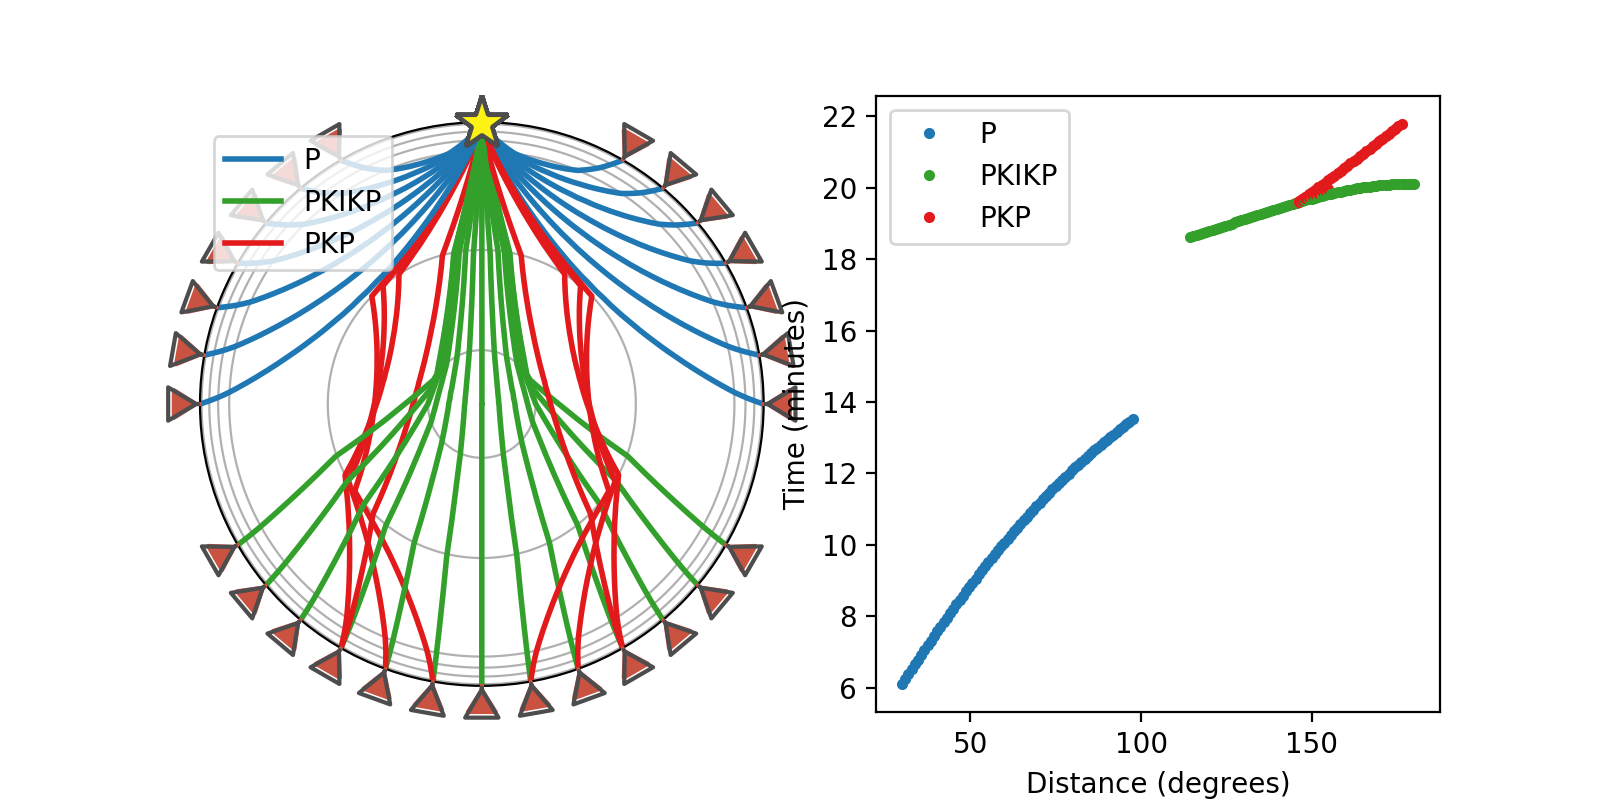

There were rays for all but the following epicentral distances:
 [100.0, 110.0, 250.0, 260.0]
There were 17 epicentral distances without an arrival


In [5]:

# velocity model as a function of depth.
model = TauPyModel(model='ak135')

# start plot
fig = plt.figure(figsize =(8,4))
# define polar subplot
ax = plt.subplot(1,2,1, polar= True)
# plot raypaths
plot_ray_paths(source_depth= depth_earthquake, min_degrees= rays_dist_min,
               max_degrees = rays_dist_max, npoints = number_of_rays,
               plot_type = "spherical", legend = True, fig=fig, ax=ax,
               phase_list = phases_to_plot, verbose = True, show = False)

# define second subplot
ax = plt.subplot(1,2,2)
# plot travel times
ax = plot_travel_times(source_depth= depth_earthquake, min_degrees= tt_dist_min,
                       max_degrees = tt_dist_max, npoints = number_of_tt,
                       legend = True, fig=fig, ax=ax,
                       phase_list = phases_to_plot, verbose = True)




##########################################################################################################
#    Appendix: Body wave naming conventions
    
###    These are specifically the naming conventions for this script (and is copied straight from the TauP manual). Also see the bottom of this page https://docs.obspy.org/packages/obspy.taup.html
    
#    -----
    In traditional 'whole-earth' seismology, there are 3 major interfaces: the free surface, the core-mantle boundary, and the inner-outer core boundary. Phases interacting with the core-mantle boundary and the inner core boundary are easy to describe because the symbol for the wave type changes at the boundary (i.e. the symbol P changes to K within the outer core even though the wave type is the same). Phase multiples for these interfaces and the free surface are also easy to describe because the symbols describe a unique path. The challenge begins with the description of interactions with interfaces within the crust and upper mantle. We have introduced two new symbols to existing nomenclature to provide unique descriptions of potential paths. Phase names are constructed from a sequence of symbols and numbers (with no spaces) that either describe the wave type, the interaction a wave makes with an interface, or the depth to an interface involved in an interaction.
    1.	Symbols that describe wave-type are:
    -	P compressional wave, upgoing or downgoing, in the crust or mantle p strictly upgoing P wave in the crust or mantle
    S shear wave, upgoing or downgoing, in the crust or mantle
    s strictly upgoing S wave in the crust or mantle
    -	K compressional wave in the outer core
    -	I  compressional wave in the inner core
    -	J  shear wave in the inner core
    
    2.	Symbols that describe interactions with interfaces are:
    -	m interaction with the moho
    -  g appended to P or S to represent a ray turning in the crust
    -  n appended to P or S to represent a head wave along the moho
    -  c topside reflection off the core mantle boundary
    -  i topside reflection off the inner core outer core boundary
    -  ˆ underside reflection, used primarily for crustal and mantle interfaces
    -  v topside reflection, used primarily for crustal and mantle interfaces
    -	diff appended to P or S to represent a diffracted wave along the core mantle boundary
    3.	The characters p and s always represent up-going legs. An example is the source to surface leg of the phase pP from a source at depth. P and S can be turning waves, but always indicate downgoing waves leaving the source when they are the first symbol in a phase name. Thus, to get near-source, direct P-wave arrival times, you need to specify two phases p and P or use the “ttimes compatibility phases” described below. However, P may represent a upgoing leg in certain cases. For instance, PcP is allowed since the direction of the phase is unambiguously determined by the symbol c, but would be named Pcp by a purist using our nomenclature.
    4.	With the ability to have sources at depth, there is a need to specify the difference between a wave that is exclusively downgoing to the receiver from one that turns and is upgoing at the receiver. The suffix ed can be appended to indicate exclusively downgoing. So for a source at 10 km depth and a receiver at 20 km depth at 0 degree distance P does nat have an arrival but Ped does.
    5.	Numbers, except velocities for kmps phases (see 10 below), represent depths at which interactions take place. For example, P410s represents a P-to-S conversion at a discontinuity at 410km depth. Since the S-leg is given by a lower-case symbol and no reflection indicator is included, this represents a P-wave converting to an S-wave when it hits the interface from below. The numbers given need not be the actual depth, the closest depth corresponding to a discontinuity in the model will be used. For example, if the time for P410s is requested in a model where the discontinuity was really located at 406.7 kilometers depth, the time returned would actually be for P406.7s. The code “taup time” would note that this had been done. Obviously, care should be taken to ensure that there are no other discontinuities closer than the one of interest, but this approach allows generic interface names like “410” and “660” to be used without knowing the exact depth in a given model.
#    
    6.	If a number appears between two phase legs, e.g. S410P, it represents a transmitted phase conversion, not a reflection. Thus, S410P would be a transmitted conversion from S to P at 410km depth. Whether the conversion occurs on the down-going side or up-going side is determined by the upper or lower case of the following leg. For instance, the phase S410P propagates down as an S, converts at the 410 to a P, continues down, turns as a P-wave, and propagates back across the 410 and to the surface. S410p on the other hand, propagates down as a S through the 410, turns as an S, hits the 410 from the bottom, converts to a p and then goes up to the surface. In these cases, the case of the phase symbol (P vs. p) is critical because the direction of propagation (upgoing or downgoing) is not unambiguously defined elsewhere in the phase name. The importance is clear when you consider a source depth below 410 compared to above 410. For a source depth greater than 410 km, S410P technically cannot exist while S410p maintains the same path (a receiver side conversion) as it does for a source depth above the 410.
    The first letter can be lower case to indicate a conversion from an up-going ray, e.g. p410S is a depth phase from a source at greater than 410 kilometers depth that phase converts at the 410 discontinuity. It is strictly upgoing over its entire path, and hence could also be labeled p410s. p410S is often used to mean a reflection in the literature, but there are too many possible interactions for the phase parser to allow this. If the underside reflection is desired, use the pˆ 410S notation from rule 7.
#    
    7.	Due to the two previous rules, P410P and S410S are over specified, but still legal. They are almost equivalent to P and S, respectively, but restrict the path to phases transmitted through (turning below) the 410. This notation is useful to limit arrivals to just those that turn deeper than a discontinuity (thus avoiding travel time curve triplications), even though they have no real interaction with it.
#    
    8.	The characters ˆ and v are new symbols introduced here to represent bottom-side and top-side reflections, respectively. They are followed by a number to represent the approximate depth of the reflection or a letter for standard discontinuities, m, c or i. Reflections from discontinuities besides the core-mantle boundary, c; or inner-core outer-core boundary, i, must use the ˆ and v notation. For instance, in the TauP convention, pˆ 410S is used to describe a near-source underside reflection.
    Underside reflections, except at the surface (PP, sS, etc.), core-mantle boundary (PKKP, SKKKS, etc.), or outer-core-inner-core boundary (PKIIKP, SKJJKS, SKIIKS, etc.), must be specified with the ˆ notation. For example, Pˆ 410P and Pˆ mP would both be underside reflections from the 410km discontinuity and the Moho, respectively.
    The phase PmP, the traditional name for a top-side reflection from the Moho discontinuity, must change names under our new convention. The new name is PvmP or Pvmp while PmP just describes a P-wave that turns beneath the Moho. The reason the Moho must be handled differently from the core-mantle boundary is that traditional nomenclature did not introduce a phase symbol change at the Moho. Thus, while PcP makes sense since a P-wave in the core would be labeled K, PmP could have several meanings. The m symbol just allows the user to describe phases interaction with the Moho without knowing its exact depth. In all other respects, the ˆ -v nomenclature is maintained.
#    
    9.	Currently, ˆ and v for non-standard discontinuities are allowed only in the crust and mantle. Thus there are no reflections off non-standard discontinuities within the core, (reflections such as PKKP, PKiKP and PKIIKP are still fine). There is no reason in principle to restrict reflections off discontinuities in the core, but until there is interest expressed, these phases will not be added. Also, a naming convention would have to be created since “p is to P” is not the same as “i is to I”.
    